# Imports

In [1]:
# pip install scikit-learn

In [2]:
# pip install "yfinance[optional]"

In [4]:
# pip install pandas_ta

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import sklearn
from sklearn.preprocessing import MinMaxScaler

# EDA

In [136]:
goog = yf.Ticker("GOOG")
msft = yf.Ticker("GOOG")

# get all stock info
# msft.info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

In [137]:
msft.history(period='1d', interval='1h')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-03-08 09:30:00-05:00,135.250000,138.539993,135.229996,138.320007,5894898,0.0,0.0
2024-03-08 10:30:00-05:00,138.339996,138.985001,137.979996,138.000000,4110973,0.0,0.0
2024-03-08 11:30:00-05:00,137.994995,138.565002,137.580002,137.970001,2976816,0.0,0.0
2024-03-08 12:30:00-05:00,137.979996,137.990005,136.220001,136.255005,2524762,0.0,0.0
2024-03-08 13:30:00-05:00,136.250000,136.835007,135.985001,136.729996,2536822,0.0,0.0
2024-03-08 14:30:00-05:00,136.740005,137.169998,136.110001,136.160004,2307955,0.0,0.0
2024-03-08 15:30:00-05:00,136.160004,136.585007,136.115005,136.289993,3067453,0.0,0.0


In [138]:
history = msft.history(period="max")

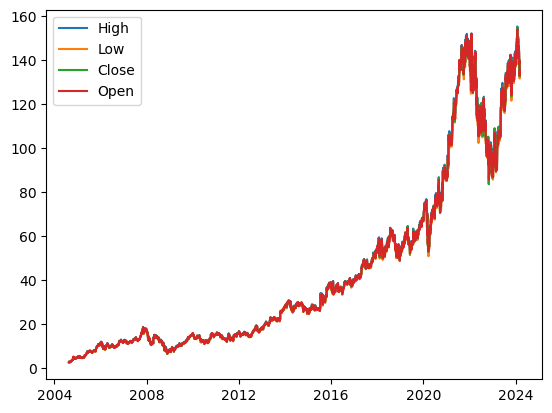

In [9]:
plt.plot(history['High'], label='High')
plt.plot(history['Low'], label='Low')
plt.plot(history['Close'], label='Close')
plt.plot(history['Open'], label='Open')
plt.legend()

In [139]:
data = goog.history(period='max')

In [140]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,136.539993,136.630005,132.860001,134.199997,43571500,0.0,0.0
2024-03-05 00:00:00-05:00,132.740005,134.020004,131.550003,133.779999,28447600,0.0,0.0
2024-03-06 00:00:00-05:00,134.240005,134.740005,131.949997,132.559998,23175200,0.0,0.0


In [141]:
data['RSI'] = data.ta.rsi()
# data['EMA'] = data.ta.ema()
data['EMAF']= ta.ema(data.Close, length=20)
data['EMAM']= ta.ema(data.Close, length=100)
data['EMAS']= ta.ema(data.Close, length=150)
data['target'] = data['Close'] - data.Open
data['target'] = data['target'].shift(-1)

data['TargetNextClose'] = data['Close'].shift(-1)

list = []
for target in data['target']:
    if target > 0:
        list.append(1)
    else:
        list.append(0)
data['target_class'] = list
# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
        
# data['target_class'] = [if data['Target'] > 0 = 1 else 0 for i in len(data)]
# [data.Open[i+1] - data.Close[i] for i in len(data)]

In [142]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,EMAF,EMAM,EMAS,target,TargetNextClose,target_class
Date,,,,,,,,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0,NaN,NaN,NaN,NaN,0.181819,2.697639,1
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0,NaN,NaN,NaN,NaN,-0.033624,2.724787,0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0,NaN,NaN,NaN,NaN,-0.158655,2.611960,0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0,NaN,NaN,NaN,NaN,0.025903,2.640104,1
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0,NaN,NaN,NaN,NaN,0.073724,2.687676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,136.539993,136.630005,132.860001,134.199997,43571500,0.0,0.0,34.716962,141.986388,139.523423,136.143178,1.039993,133.779999,1
2024-03-05 00:00:00-05:00,132.740005,134.020004,131.550003,133.779999,28447600,0.0,0.0,34.192299,141.204827,139.409692,136.111878,-1.680008,132.559998,0
2024-03-06 00:00:00-05:00,134.240005,134.740005,131.949997,132.559998,23175200,0.0,0.0,32.648811,140.381510,139.274054,136.064833,1.350006,135.240005,1


In [26]:
data.index[-1]

Timestamp('2024-03-08 00:00:00-0500', tz='America/New_York')

(19074.166666666668, 19790.208333333332)

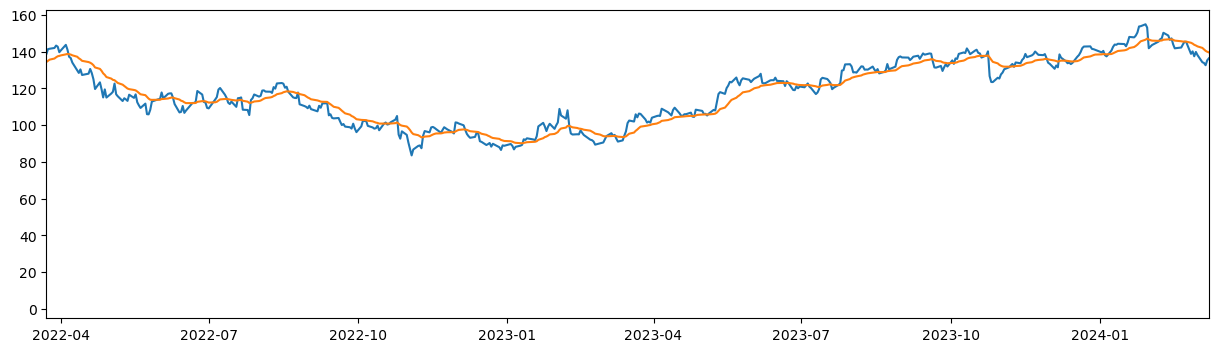

In [144]:
plt.figure(figsize=(15, 4))
plt.plot(data.Close)
plt.plot(data.EMAF)
plt.xlim(data.index[int(len(data) * 0.9)], data.index[-1])

In [145]:
sc_data = MinMaxScaler(feature_range=(0,1))
sc_response = MinMaxScaler(feature_range=(0,1))

In [146]:
target_column = 'TargetNextClose'

In [147]:
response_scaled = sc_response.fit_transform(data[[target_column]])

data_set_scaled = sc_data.fit_transform(data.loc[:, data.columns != target_column])
data_set_scaled_new = []
for i in range(len(data_set_scaled)):
    data_set_scaled_new.append([])
    data_set_scaled_new[i] = np.append(data_set_scaled[i], response_scaled[i])
    
data_set_scaled_new = np.asarray(data_set_scaled_new)

In [148]:
data_set_scaled_new.shape

(4922, 14)

# Split Train Test

In [149]:
X = []
#how many days into the past
backcandles = 30
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled_new.shape[0]):
        X[j].append(data_set_scaled_new[i - backcandles:i, j])
        
#Move axis from 0 to 2
X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
y = np.reshape(yi, (len(yi), 1))

print(X, X.shape)
print(y, y.shape)

[[[1.33127177e-04 3.78492201e-04 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00            nan]
  [2.99130235e-04 1.19748236e-03 7.51185841e-04 ... 0.00000000e+00
   0.00000000e+00            nan]
  [1.89997290e-03 1.91531806e-03 2.16586704e-03 ... 0.00000000e+00
   0.00000000e+00            nan]
  ...
  [3.63394432e-03 4.18628844e-03 4.01239754e-03 ... 0.00000000e+00
   0.00000000e+00 8.13709264e-01]
  [4.52147509e-03 5.42945367e-03 5.00846418e-03 ... 0.00000000e+00
   0.00000000e+00 8.56237899e-01]
  [5.04741680e-03 4.98570112e-03 5.46678455e-03 ... 0.00000000e+00
   0.00000000e+00 8.00098740e-01]]

 [[2.99130235e-04 1.19748236e-03 7.51185841e-04 ... 0.00000000e+00
   0.00000000e+00            nan]
  [1.89997290e-03 1.91531806e-03 2.16586704e-03 ... 0.00000000e+00
   0.00000000e+00            nan]
  [1.98050748e-03 1.60860318e-03 1.25914443e-03 ... 0.00000000e+00
   0.00000000e+00            nan]
  ...
  [4.52147509e-03 5.42945367e-03 5.00846418e-03 ... 0.00000000e+00
   0.00000

In [150]:
splitlimit = int(len(X) * 0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
Y_train, Y_test = y[:splitlimit], y[splitlimit:]


3913


# Make Model

In [151]:
# model = keras.Sequential()

input = keras.layers.Input(shape=(backcandles, 8), name = 'lstm_input')

lstm = keras.layers.LSTM(150, name='first_layer')(input)
# dense = keras.layers.Dense(8)
dense_end = keras.layers.Dense(1, name='dense_layer')(lstm)
# dense_end = keras.layers.Dense(1)
# activate = keras.activations('relu')
output = keras.layers.Activation('linear', name='output')(dense_end)


model = keras.Model(inputs=input, outputs=output)

model.summary()
model.output_shape

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 8)]           0         
                                                                 
 first_layer (LSTM)          (None, 150)               95400     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 95,551
Trainable params: 95,551
Non-trainable params: 0
_________________________________________________________________


2024-03-10 13:45:39.678276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-10 13:45:39.679144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-10 13:45:39.680015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

(None, 1)

In [152]:
adam = keras.optimizers.legacy.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=Y_train, batch_size=15, epochs=10, shuffle=True, validation_split=0.1)

Epoch 1/10


2024-03-10 13:45:43.249026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-10 13:45:43.250442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-10 13:45:43.251368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

234/235 [============================>.] - ETA: 0s - loss: nan

2024-03-10 13:45:48.836856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-10 13:45:48.837943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-10 13:45:48.838948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

235/235 [==============================] - 6s 21ms/step - loss: nan - val_loss: nan
Epoch 2/10
235/235 [==============================] - 4s 15ms/step - loss: nan - val_loss: nan
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: nan - val_loss: nan
Epoch 4/10
235/235 [==============================] - 3s 15ms/step - loss: nan - val_loss: nan
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: nan - val_loss: nan
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: nan - val_loss: nan
Epoch 7/10
235/235 [==============================] - 3s 15ms/step - loss: nan - val_loss: nan
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: nan - val_loss: nan
Epoch 9/10
235/235 [==============================] - 3s 15ms/step - loss: nan - val_loss: nan
Epoch 10/10
235/235 [==============================] - 3s 15ms/step - loss: nan - val_loss: nan


# Model Evaluation

In [ ]:
y_pred = model.predict